# Logistic Regression


Researchers are often interested in setting up a model to analyze the relationship between some predictors (i.e., independent variables) and a response (i.e., dependent variable). Linear regression is commonly used when the response variable is continuous.  One assumption of linear models is that the residual errors follow a normal distribution. This assumption fails when the response variable is categorical, so an ordinary linear model is not appropriate. This newsletter presents a regression model for a response variable that is dichotomous–having two categories. Examples are common: whether a plant lives or dies, whether a survey respondent agrees or disagrees with a statement, or whether an at-risk child graduates or drops out from high school.

In ordinary linear regression, the response variable (Y) is a linear function of the coefficients (B0, B1, etc.) that correspond to the predictor variables (X1, X2, etc.). A typical model would look like:

    Y = B0 + B1*X1 + B2*X2 + B3*X3 + … + E

For a dichotomous response variable, we could set up a similar linear model to predict individuals’ category memberships if numerical values are used to represent the two categories. Arbitrary values of 1 and 0 are chosen for mathematical convenience. Using the first example, we would assign Y = 1 if a plant lives and Y = 0 if a plant dies.

This linear model does not work well for a few reasons. First, the response values, 0 and 1, are arbitrary, so modeling the actual values of Y is not exactly of interest. Second, it is really the probability that each individual in the population responds with 0 or 1 that we are interested in modeling. For example, we may find that plants with a high level of a fungal infection (X1) fall into the category “the plant lives” (Y) less often than those plants with low level of infection. Thus, as the level of infection rises, the probability of a plant living decreases.

Thus, we might consider modeling P, the probability, as the response variable. Again, there are problems. Although the general decrease in probability is accompanied by a general increase in infection level, we know that P, like all probabilities, can only fall within the boundaries of 0 and 1. Consequently, it is better to assume that the relationship between X1 and P is sigmoidal (S-shaped), rather than a straight line.

It is possible, however, to find a linear relationship between X1 and a function of P. Although a number of functions work, one of the most useful is the logit function. It is the natural log of the odds that Y is equal to 1, which is simply the ratio of the probability that Y is 1 divided by the probability that Y is 0. The relationship between the logit of P and P itself is sigmoidal in shape. The regression equation that results is:

    ln[P/(1-P)] = B0 + B1*X1 + B2*X2 + …

Although the left side of this equation looks intimidating, this way of expressing the probability results in the right side of the equation being linear and looking familiar to us. This helps us understand the meaning of the regression coefficients. The coefficients can easily be transformed so that their interpretation makes sense.

The logistic regression equation can be extended beyond the case of a dichotomous response variable to the cases of ordered categories and polytymous categories (more than two categories).

# Mathematics behind Logistic Regression

## Notation

The problem structure is the classic classification problem. Our data set $\mathcal{D}$ is composed of $N$ samples. Each sample is a tuple containing a feature vector and a label. For any sample $n$ the feature vector is a $d+1$ dimensional column vector denoted by ${\bf x}_n$ with $d$ real-valued components known as features. Samples are represented in homogeneous form with the first component equal to $1$: $x_0=1$. Vectors are bold-faced. The associated label is denoted $y_n$ and can take on only two values: $+1$ or $-1$.

$$
\mathcal{D} = \lbrace ({\bf x}_1, y_1), ({\bf x}_2, y_2), ..., ({\bf x}_N, y_N) \rbrace \\
{\bf x}_n = \begin{bmatrix} 1 & x_1 & ... & x_d \end{bmatrix}^T 
$$

## Derivation

Despite the name logistic *regression* this is actually a probabilistic classification model. It is also a linear model which can be subjected to nonlinear transforms.

All linear models make use of a "signal" $s$ which is a linear combination of the input vector ${\bf x}$ components weighed by the corresponding components in a weight vector ${\bf w}$.

$$
{\bf w} = \begin{bmatrix} w_0 & w_1 & ... & w_d \end{bmatrix}^T \\
s = w_0 + w_1 x_1 + \;...\; + w_d x_d = \sum_{i=0}^d w_i x_i = {\bf w} \cdot {\bf x} = {\bf w}^T {\bf x}
$$

Note that the homogeneous representation (with the $1$ at the first component) allows us to include a constant offset using a more compact vector-only notation (instead of ${\bf w}^T {\bf x}+b$).

Linear classification passes the signal through a harsh threshold:

$$
h({\bf x}) = \operatorname{sign}(s)
$$

Linear regression uses the signal directly without modification:

$$
h({\bf x}) = s
$$

Logistic regression passes the signal through the logistic/sigmoid but then treats the result as a probability:

$$
h({\bf x}) = \theta(s)
$$

The [logistic function](http://en.wikipedia.org/wiki/Logistic_function) is

$$
\theta(s) = \frac{e^s}{1+e^s} = \frac{1}{1+e^{-s}}
$$

There are many other formulas that can achieve a soft threshold such as the hyperbolic tangent, but this function results in some nice simplification.

We say that the data is generated by a noisy target.

$$
P(y\mid{\bf x})=\begin{cases}
f({\bf x}) & \text{for }y=+1 \\
1-f({\bf x}) & \text{for }y=-1
\end{cases}
$$

With this noisy target we want to learn a hypothesis $h({\bf x})$ that best fits the above noisy target according to some error function.

$$
h({\bf x})=\theta({\bf w}^T {\bf x})\approx f({\bf x})
$$

It's important to note that the data does not tell you the probability of a label but rather what label the sample has after being generated by the target distribution.

## Error Measure

To learn a good hypothesis we want to find a hypothesis parameterization ${\bf w}$ (the weight vector) that minimizes some in-sample error measure $E_\text{in}$.

$$
{\bf w}_h = \underset{{\bf w}}{\operatorname{argmin}} \; E_\text{in}({\bf w})
$$

The error measure we will use is both plausible and nice. It is based on likelihood which is the probability of generating the data given a model.

If our hypothesis is close to our target distribution ($h\approx f$) then we expect that probability of generating the data to be high.

There is some controversy with using likelihood. We are really looking for the most probable hypothesis given the data: $\underset{h}{\operatorname{argmax}} P(h\mid{\bf x})$. The likelihood approach is looking for the hypothesis that makes the data most probable: $\underset{h}{\operatorname{argmax}} P({\bf x}\mid h)$.

The Bayesian approach tackles this issue using Bayes' Theorem but introduces other issues such as choosing priors.

To determine the likelihood we assume the data was generated with our hypothesis $h$:

$$
P(y\mid{\bf x})=\begin{cases}
h({\bf x}) & \text{for }y=+1 \\
1-h({\bf x}) & \text{for }y=-1
\end{cases} \\
$$

where $h({\bf x})=\theta({\bf w}^T {\bf x})$.

We don't want to deal with cases so we take advantage of a nice property of the logistic function: $\theta(-s)=1-\theta(s)$.

$$
\text{if } y = +1 \text{ then } h({\bf x}) = \theta({\bf w}^T {\bf x}) = \theta(y \; {\bf w}^T {\bf x}) \\
\text{if } y = -1 \text{ then } 1 - h({\bf x}) = 1 - \theta({\bf w}^T {\bf x}) = \theta(- {\bf w}^T {\bf x}) = \theta(y \; {\bf w}^T {\bf x}) \\
$$

Using this simplification,

$$
P(y\mid{\bf x})=\theta(y\; {\bf w}^T {\bf x})
$$

The likelihood is defined for a data set $\mathcal{D}$ with $N$ samples given a hypothesis (denoted arbitrarily $g$ here):

$$
L(\mathcal{D} \mid g) =
\prod_{n=1}^{N} P(y_n \mid {\bf x}_n) =
\prod_{n=1}^{N} \theta(y_n \; {\bf w}_g^T {\bf x}_n)
$$

Now finding a good hypothesis is a matter of finding a hypothesis parameterization ${\bf w}$ that maximizes the likelihood.

$$
{\bf w}_h =
\underset{{\bf w}}{\operatorname{argmax}} \; L(\mathcal{D} \mid h) = 
\underset{{\bf w}}{\operatorname{argmax}} \; \theta(y_n \; {\bf w}^T {\bf x}_n)
$$

Maximizing the likelihood is equivalent to maximizing the log of the function since the natural logarithm is a monotonically increasing function:

$$
\underset{{\bf w}}{\operatorname{argmax}} \; \ln \left( \prod_{n=1}^{N} \theta(y_n \; {\bf w}^T {\bf x}_n) \right)
$$

We can maximize the above proportional to a constant as well so we'll tack on a $\frac{1}{N}$:

$$
\underset{{\bf w}}{\operatorname{argmax}} \; \frac{1}{N} \ln \left( \prod_{n=1}^{N} \theta(y_n \; {\bf w}^T {\bf x}_n) \right)
$$

Now maximizing that is the same as minimizing its negative:

$$
\underset{{\bf w}}{\operatorname{argmin}} \left[ -\frac{1}{N} \ln \left( \prod_{n=1}^{N} \theta(y_n \; {\bf w}^T {\bf x}_n) \right) \right]
$$

If we move the negative into the log and the log into the product we turn the product into a sum of logs:

$$
\underset{{\bf w}}{\operatorname{argmin}} \;\frac{1}{N} \sum_{n=1}^{N} \ln \left( \frac{1}{\theta(y_n \; {\bf w}^T {\bf x}_n)} \right)
$$

Expanding the logistic function,

$$
\underset{{\bf w}}{\operatorname{argmin}} \;\frac{1}{N} \sum_{n=1}^{N} \ln \left( 1 + e^{y_n \; {\bf w}^T {\bf x}_n} \right)
$$

Now we have a much nicer form for the error measure known as the "cross-entropy" error.

$$
E_\text{in}({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right)
$$

This is nice because it can be interpreted as the average point error where the point error function is

$$
e(h({\bf x}_n), y_n) = \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right) \\
E_\text{in}({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} e(h({\bf x}_n), y_n)
$$

So to learn a hypothesis we'll want to perform the following optimization:

$$
{\bf w}_h =
\underset{{\bf w}}{\operatorname{argmin}} \; E_\text{in}({\bf w}) =
\underset{{\bf w}}{\operatorname{argmin}} \;\frac{1}{N} \sum_{n=1}^{N} \ln \left( 1 + e^{y_n \; {\bf w}^T {\bf x}_n} \right)
$$

## Learning Algorithm

The learning algorithm is how we search the set of possible hypotheses (hypothesis space $\mathcal{H}$) for the best parameterization (in this case the weight vector ${\bf w}$). This search is an optimization problem looking for the hypothesis that optimizes an error measure.

There is no nice, closed-form solution like with least-squares linear regression so we will use gradient descent instead. Specifically we will use batch gradient descent which calculates the gradient from all data points in the data set.

Luckily, our "cross-entropy" error measure is convex so there is only one minimum. Thus the minimum we arrive at is the global minimum.

Gradient descent is a general method and requires twice differentiability for smoothness. It updates the parameters using a first-order approximation of the error surface.

$$
{\bf w}_{i+1} = {\bf w}_i + \nabla E_\text{in}({\bf w}_i)
$$

To learn we're going to minimize the following error measure using batch gradient descent.

$$
e(h({\bf x}_n), y_n) = \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right) \\
E_\text{in}({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} e(h({\bf x}_n), y_n) = \frac{1}{N} \sum_{n=1}^{N} \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right)
$$

We'll need to the derivative of the point loss function and possibly some abuse of notation.

$$
\frac{d}{d{\bf w}} e(h({\bf x}_n), y_n)
= \frac{-y_n \; {\bf x}_n \; e^{-y_n {\bf w}^T {\bf x}_n}}{1 + e^{-y_n {\bf w}^T {\bf x}_n}}
= -\frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}}
$$

With the point loss derivative we can determine the gradient of the in-sample error:

$$
\begin{align}
\nabla E_\text{in}({\bf w})
&= \frac{d}{d{\bf w}} \left[ \frac{1}{N} \sum_{n=1}^N e(h({\bf x}_n), y_n) \right] \\
&= \frac{1}{N} \sum_{n=1}^N \frac{d}{d{\bf w}} e(h({\bf x}_n), y_n) \\
&= \frac{1}{N} \sum_{n=1}^N \left( - \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \right) \\
&= - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \\
\end{align}
$$

Our weight update rule per batch gradient descent becomes

$$
\begin{align}
{\bf w}_{i+1} &= {\bf w}_i - \eta \; \nabla E_\text{in}({\bf w}_i) \\
&= {\bf w}_i - \eta \; \left( - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
&= {\bf w}_i + \eta \; \left( \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
\end{align}
$$

where $\eta$ is our learning rate.

# Cross-Sell and Up-Sell
Up-selling and cross selling are two sales techniques that add value to any one order or existing client portfolio. The up-sell looks to get the purchaser of the product to buy an upgrade, while the cross-sell tries to convince the customer to add another, related, product to the order.

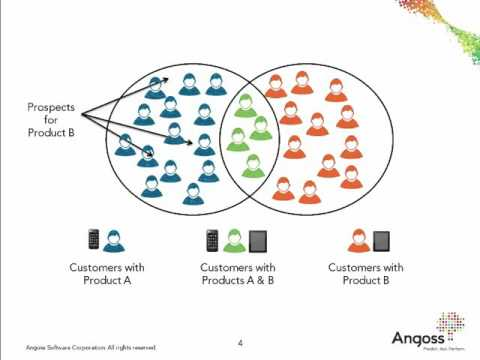

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('VMavY0pBo2o')

<img src = "Images/Cross_Sell_v01.png">

## Up Sell
In an up-sell, you try to sell the client a better product. 

Think of a car salesman after you already say you want to buy a specific car. He will then go through a series of options and upgrades you can have that customize and improves your model. This is a form of an upsell. 

Another form is commonly seen in membership sites, such a dating site, where you can have a free version, a basic version or a premium version.

## Cross Sell
Cross-selling typically happens at the time of sale when the customer already has his wallet out. Cross-selling takes different products and gives the customer the option to add to his order. 

Think about Amazon's check out process. It clearly tells you what other customers bought with this same purchase. It plants the seed of what compliments the existing purchase. 

Cross-selling often bundles things in a way to give the buyer a discount on the entire purchase as well or some other incentive such as free shipping. 

Again, Amazon does this well by letting customers know how much more they need in the purchase amount to be eligible for free shipping.

<img src = "Images/sell.png">

# Real-time example : 
We have a dataset which contains information about customers' income, demographics, financial details and whether they took the credit card or not.

Goal is to design a model that can predict the probability of customer being cross-sold a credit card if given the customers' information.

A logistic regression model can be used on the given data which will predict and provide minimum error. This logistic model is then used for any new data. That is, if we give information of any customer as an input, our model should predict the probability of customer cross-sold credit card with minimum error.

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [36]:
# read data into a DataFrame
import pandas as pd
data = pd.read_csv('Data/bank-data_modified_cross_sell_v01.csv')
print(data.head())

       _id  age     sex      region   income married  children  car save_act  \
0  ID12101   48    MALE  INNER_CITY  17546.0     YES         1   NO       NO   
1  ID12102   40    MALE        TOWN  30085.1     YES         3   NO       NO   
2  ID12103   51  FEMALE  INNER_CITY  15461.0     YES         0  YES      YES   
3  ID12104   23    MALE        TOWN  20375.4     YES         3   NO       NO   
4  ID12105   57  FEMALE       RURAL  34166.0     YES         0   NO      YES   

  current_act mortgage  Spend_%Change_in_last_qtr cross_sell  
0          NO       NO                         22        YES  
1         YES      YES                          1         NO  
2         YES      YES                          1         NO  
3         YES       NO                          4         NO  
4          NO       NO                          1         NO  


In [37]:
print(data.shape)

(600, 13)


There are 600 customers' information in the data with 13 variables. Out of these 13, 1 is target variable and rest 12 are predictor variables.

What are the **features**?
- id : Customer ID
- age : Age of the Customer
- sex : Gender of the Customer
- region : Area type of the Customer Location
- income : Income of the Customer
- married : Marrital Status of the Customer
- children : Number of Children of the Customer
- car : Does customer have car or not ?
- save_act : Does customer have Saving account or not ?
- current_act : Does customer have Current account ot not ?
- mortgage : Does customer have mortgage or not ?
- Spend_%Change_in_last_qtr : How much change in percentage customer spent in last quarter ?

What is the **response**?
- cross_sell : whether customer was cross-sold the credit card or not.

## Questions About the Customers Data

Let's say you work in the credit card sales team for a bank who wants to sell their credit cards to their customers. The company might ask you the following: On the basis of this data, who should we target to sell credit card in the future?

This general question might lead you to more specific questions:
1. What features are important while predicting cross-sell?
2. How strong is that relationship?
3. Which region types contribute to cross selling more?
4. What is the effect of having saving and current account to cross selling ?
5. Given a customer's information, can probability of cross-selling be predicted?

We will explore these questions below!

# Data Exploration
Let's explore the data.

In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
_id                          600 non-null object
age                          600 non-null int64
sex                          600 non-null object
region                       600 non-null object
income                       600 non-null float64
married                      600 non-null object
children                     600 non-null int64
car                          600 non-null object
save_act                     600 non-null object
current_act                  600 non-null object
mortgage                     600 non-null object
Spend_%Change_in_last_qtr    600 non-null int64
cross_sell                   600 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 61.1+ KB
None


* Out of 13 variables, only 4 are numeric and 9 are objects.
* id : A unique identifier for Customer

In [39]:
print(data.describe())

              age        income    children  Spend_%Change_in_last_qtr
count  600.000000    600.000000  600.000000                 600.000000
mean    41.233333  28053.140883    1.021667                   7.416667
std     13.423457  12771.220714    1.093858                   7.091559
min     18.000000   5014.210000    0.000000                   1.000000
25%     30.000000  17529.000000    0.000000                   2.000000
50%     40.000000  25583.950000    1.000000                   4.000000
75%     50.000000  37413.425000    2.000000                  12.000000
max     67.000000  63130.100000    4.000000                  24.000000


# Missing Value Check
Check if any column has missing or null value.

In [40]:
print(data.isnull().sum())

_id                          0
age                          0
sex                          0
region                       0
income                       0
married                      0
children                     0
car                          0
save_act                     0
current_act                  0
mortgage                     0
Spend_%Change_in_last_qtr    0
cross_sell                   0
dtype: int64


No columns have missing or null value.

# Outlier Detection
Check if any column has any outliers or not.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
# this allows plots to appear directly in the notebook
%matplotlib inline

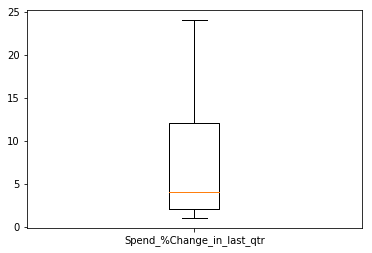

In [7]:
box_data = np.array(data[['Spend_%Change_in_last_qtr']])
plt.boxplot(box_data,labels=['Spend_%Change_in_last_qtr'])
plt.show()

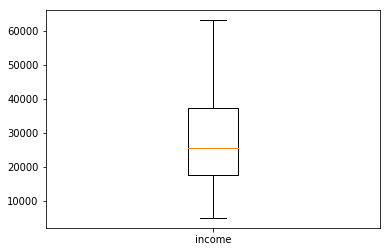

In [8]:
box_data = np.array(data[['income']])
plt.boxplot(box_data,labels=['income'])
plt.show()

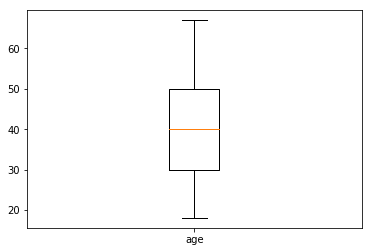

In [9]:
box_data = np.array(data[['age']])
plt.boxplot(box_data,labels=['age'])
plt.show()

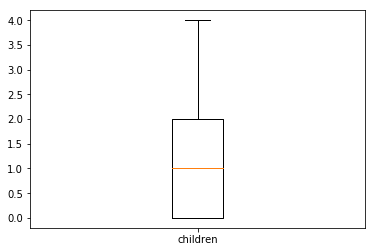

In [10]:
box_data = np.array(data[['children']])
plt.boxplot(box_data,labels=['children'])
plt.show()

It seems there are no outliers in the data.

# Exploratory Analysis
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. 

In this stage, you will find yourself classifying features and determining their correlation with the target variable and each other.

Let's transform cross_sell variable into numeric variable with levels 0 and 1

In [42]:
target = pd.get_dummies(data['cross_sell'],drop_first=True)
print(target.head())

   YES
0    1
1    0
2    0
3    0
4    0


In [43]:
data = pd.concat([data,target],axis=1)
data = data.drop('cross_sell',axis=1)
data = data.rename(columns={'YES':'cross_sell'})
print(data.head())

       _id  age     sex      region   income married  children  car save_act  \
0  ID12101   48    MALE  INNER_CITY  17546.0     YES         1   NO       NO   
1  ID12102   40    MALE        TOWN  30085.1     YES         3   NO       NO   
2  ID12103   51  FEMALE  INNER_CITY  15461.0     YES         0  YES      YES   
3  ID12104   23    MALE        TOWN  20375.4     YES         3   NO       NO   
4  ID12105   57  FEMALE       RURAL  34166.0     YES         0   NO      YES   

  current_act mortgage  Spend_%Change_in_last_qtr  cross_sell  
0          NO       NO                         22           1  
1         YES      YES                          1           0  
2         YES      YES                          1           0  
3         YES       NO                          4           0  
4          NO       NO                          1           0  


Let's plot some charts for exploratory analysis. And this time, use **SEABORN** library.

# Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In the notebook, many times we see warnings given by the interpreter. These warnings can be suppressed or ignored by following code :

In [44]:
import warnings
warnings.filterwarnings("ignore")

Now, we will import SEABORN library with alias as *sns*.

In [14]:
import seaborn as sns

Seaborn provides very easy functions to plot different types of charts.

One of them is boxplot.

### Boxplot
Boxplot can be plotted using seaborn's boxplot() by providing name of x column and y column which are present in data.

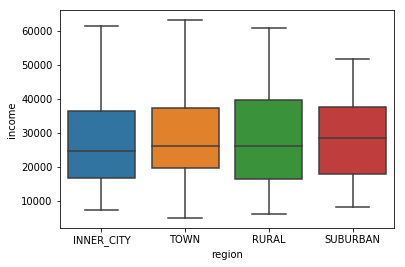

In [15]:
sns.boxplot(x = 'region', y = 'income', data = data) 

Let's see some barplots now.

### Seaborn's barplot 
A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

Barplot also takes similar arguments as boxplot.


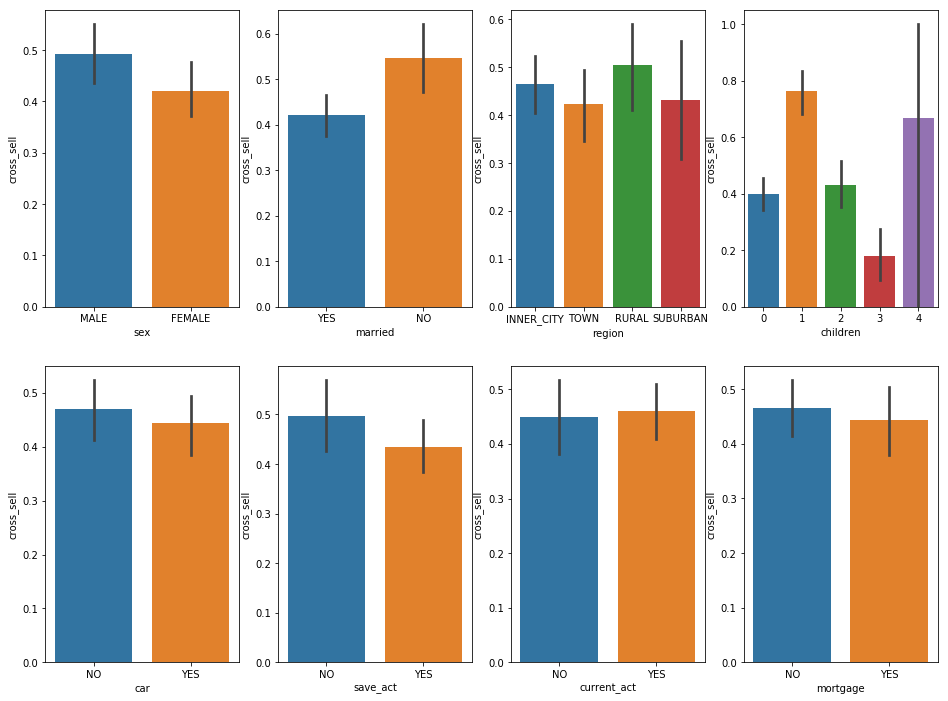

In [16]:
fig, saxis = plt.subplots(2, 4,figsize=(16,12))

sns.barplot(x = 'sex', y = 'cross_sell', data=data, ax = saxis[0,0])
sns.barplot(x = 'married', y = 'cross_sell', data=data, ax = saxis[0,1])
sns.barplot(x = 'region', y = 'cross_sell', data=data, ax = saxis[0,2])
sns.barplot(x = 'children', y = 'cross_sell', data=data, ax = saxis[0,3])
sns.barplot(x = 'car', y = 'cross_sell', data=data, ax = saxis[1,0])
sns.barplot(x = 'save_act', y = 'cross_sell', data=data, ax = saxis[1,1])
sns.barplot(x = 'current_act', y = 'cross_sell', data=data, ax = saxis[1,2])
sns.barplot(x = 'mortgage', y = 'cross_sell', data=data, ax = saxis[1,3])

In the above code, we want to plot 8 charts together. For this, we make use of subplots() of matplotlib's pyplot module.

For each chart, we have to specify, which chart should be plotted at which position using axis argument. 

#### Error bars
Error bars are graphical representations of the variability of data and plotted on graphs to indicate the error or uncertainty in a reported measurement. They give a general idea of how precise a measurement is, or conversely, how far from the reported value the true (error free) value might be. Error bars represent 95% confidence interval here.

Black vertical lines at the top of each bar are **Error bars**. This represents a 95% confidence interval (by default) around each estimate.

#### From above barplots, we can infer following :
* Male customers have been more cross-sold than Female customers.

* Unmarried customers have been more cross-sold than Married customers.

* Customers belonging to Rural region have been more cross-sold than other regions.

* Customers having one children have been cross-sold more.

* Customers with saving account have been cross-sold more than customers not having saving account.

* Having Car, current account and mortgage or not do not impact much or cross-sold products.

### Seaborn's violinplot

A Violin Plot is used to visualise the distribution of the data and its probability density. This chart is a combination of a Box Plot and a Density Plot that is rotated and placed on each side, to show the distribution shape of the data.

Violinplot also takes similar arguments as boxplot.

<img src = "Images/violin-graph.png">

#### Why Violin plots are better than Box plot and Density plot :
* The "violin" shape of a violin plot comes from the data’s density plot. You just turn that density plot sideway and put it on both sides of the box plot, mirroring each other.

* Reading the violin shape is exactly how you read a density plot: the thicker part means the values in that section of the violin has higher frequency, and the thinner part implies lower frequency.

* Violin plots are easy to read. The dot in the middle is the median. The box presents interquartile range. The whiskers show 95% confidence interval. The shape of the violin display frequencies of values.


* Unlike bar graphs with means and error bars, violin plots contain all data points. This make them an excellent tool to visualize samples of small sizes. Violin plots are perfectly appropriate even if your data do not conform to normal distribution. They work well to visualize both quantitative and qualitative data.


Text(0.5,1,'Region vs Spend_%Change_in_last_qtr cross_sell Comparison')

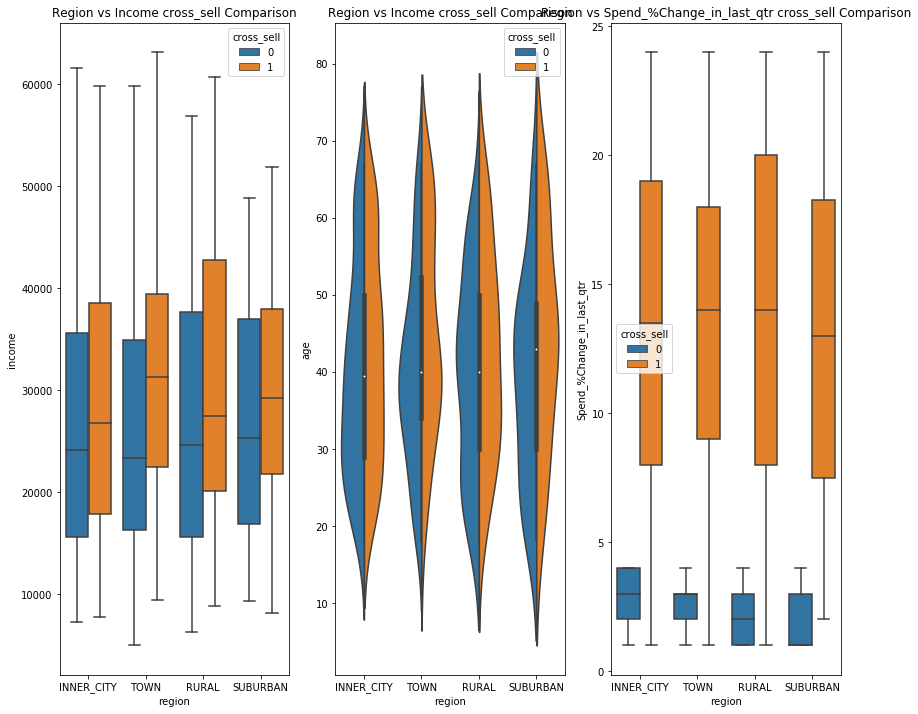

In [17]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'region', y = 'income', hue = 'cross_sell', data = data, ax = axis1)
axis1.set_title('Region vs Income cross_sell Comparison')

sns.violinplot(x = 'region', y = 'age', hue = 'cross_sell', data = data, split = True, ax = axis2)
axis2.set_title('Region vs Income cross_sell Comparison')

sns.boxplot(x = 'region', y ='Spend_%Change_in_last_qtr', hue = 'cross_sell', data = data, ax = axis3)
axis3.set_title('Region vs Spend_%Change_in_last_qtr cross_sell Comparison')

#### From above barplots, we can infer following :
* Customers located at any region and have high income have been more cross-sold. High income corresponds to more cross-selling.

* For any region, age does not play important role in cross-selling.

* Spend Percent Change in last quarter plays very important role in cross-selling. Higher the spend percent change, more cross-selling chances are there.

### Seaborn's pairplot

Diagonal present the histogram of a variable and plots in upper and lower triangles present the scatter plot between two variables.

The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

Pairplot takes whole data and hue as target variable with size of the charts and palette arguments for visualization.

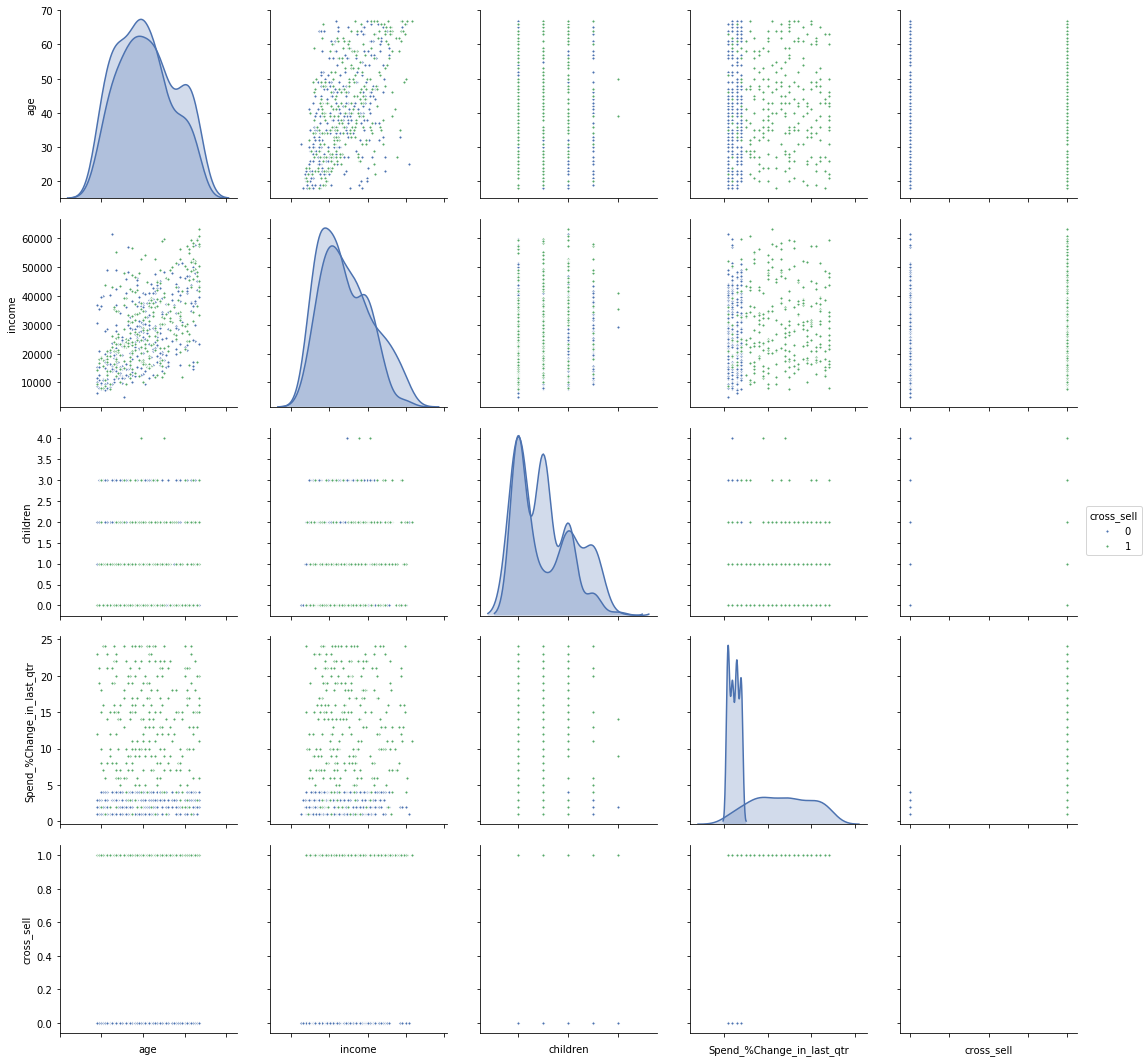

In [18]:
#pair plots of entire dataset
pp = sns.pairplot(data, hue = 'cross_sell', palette = 'deep', size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

Different scatterplots and histograms can be seen and analzed.

### Seaborn's heatmap
A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 

The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools as per the creator's requirement.

Heatmap takes whole correlation matrix calculated using .corr() method of pandas dataframe and colormap, axis, linewidth etc. arguments for visualization.

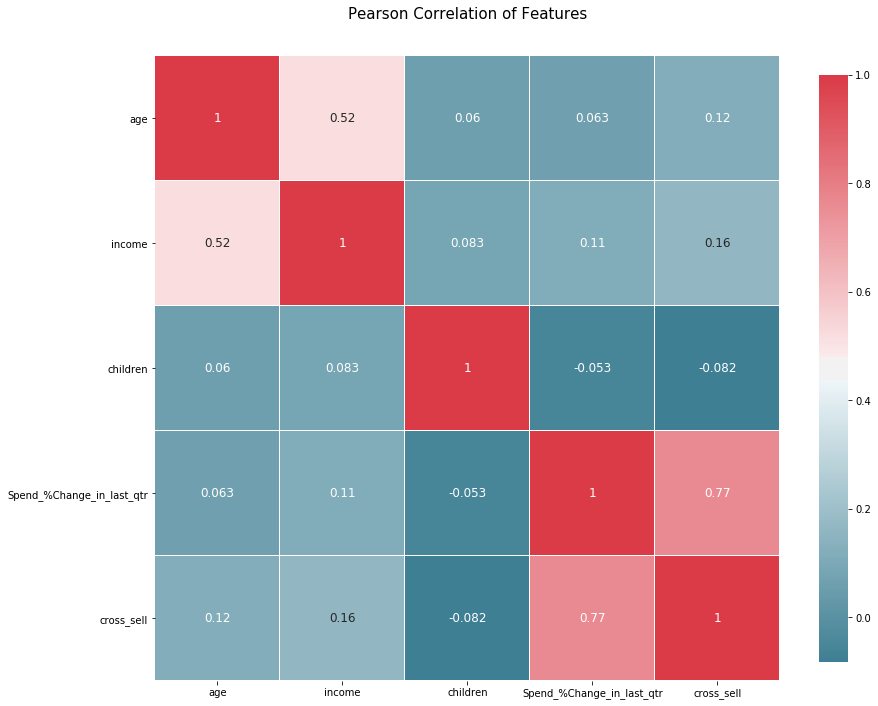

In [19]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

Correlation matrix has been visualized as heatmap. 

* Income and Age have high positive correlation (Multi-collinearity).

* **cross_sell** has high correlation with *Spend percent change*.

### Seaborn's distplot
A distplot is nothing but a histogram which represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

Distplot takes one numeric variable and plot its histogram.

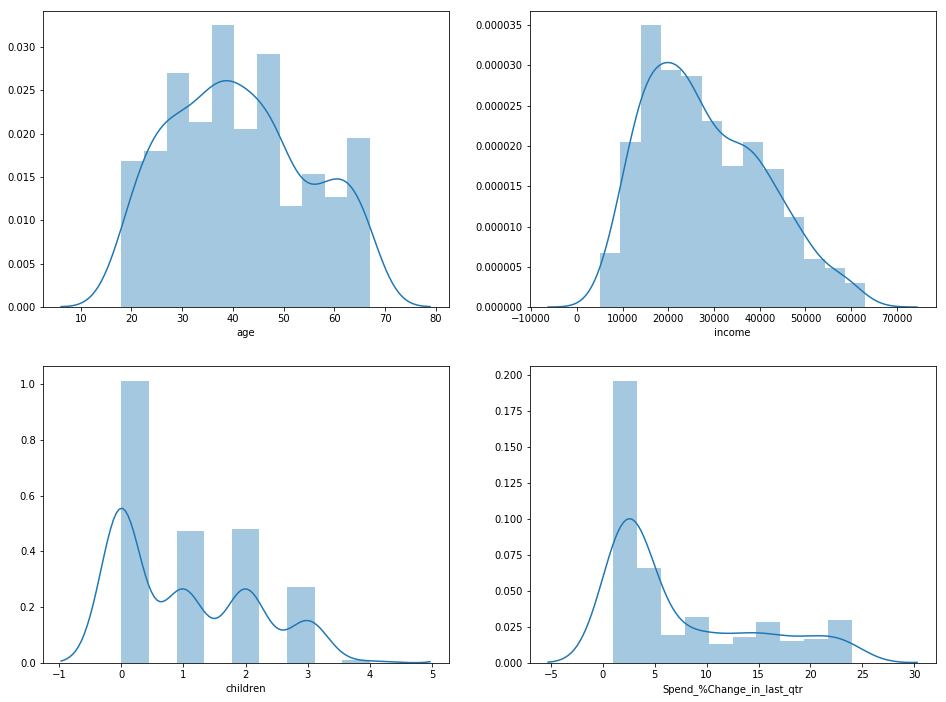

In [20]:
fig, saxis = plt.subplots(2, 2,figsize=(16,12))
sns.distplot(data['age'],ax = saxis[0,0])
sns.distplot(data['income'],ax=saxis[0,1])
sns.distplot(data['children'],ax=saxis[1,0])
sns.distplot(data['Spend_%Change_in_last_qtr'],ax=saxis[1,1])


# Categorical Variables treatment
Moving forward, we will convert categorical variables into numeric to feed into the model.

In [45]:
print(data.info())

#print(pd.get_dummies(data['Gender']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
_id                          600 non-null object
age                          600 non-null int64
sex                          600 non-null object
region                       600 non-null object
income                       600 non-null float64
married                      600 non-null object
children                     600 non-null int64
car                          600 non-null object
save_act                     600 non-null object
current_act                  600 non-null object
mortgage                     600 non-null object
Spend_%Change_in_last_qtr    600 non-null int64
cross_sell                   600 non-null uint8
dtypes: float64(1), int64(3), object(8), uint8(1)
memory usage: 57.0+ KB
None


**Categorical variables** : sex, region, married, car, save_act, current_act, mortgage, cross_sell

Let's find out which variable has how many unique values.

In [46]:
cat_vars = ['sex','region','married','car','save_act','current_act','mortgage']
print(data[cat_vars].nunique())

sex            2
region         4
married        2
car            2
save_act       2
current_act    2
mortgage       2
dtype: int64


Above code makes use of **nunique()** to count the number of unique values in each column specified by cat_vars(which contains names of all categorical variables)

Now, we know all categorical variables contain only 2 values other than region which contains 4 values.

In [47]:
print(pd.get_dummies(data['sex']))

     FEMALE  MALE
0         0     1
1         0     1
2         1     0
3         0     1
4         1     0
..      ...   ...
595       1     0
596       1     0
597       1     0
598       0     1
599       0     1

[600 rows x 2 columns]


We have already studied how to use get_dummies() in our Linear Regression session.

Let's study it in a bit more detail.

Here using get_dummies() on sex variable producing two variables : FEMALE AND MALE.

We know, if value of variable is not FEMALE, then it would be MALE and vice-versa. That means, that both these new variables FEMALE and MALE are related with each other. Both are negate of each other. 

This will produce multicollinearity in the data.

Thus, we need to create only single variable from original variable to say whether MALE or FEMALE.




We can do this by using argument drop_first=True in the get_dummies().

We can also use another argument 'columns' to do the dummy creation for all categorical variables in single line of code.

Let's see how we can do this.

In [48]:
data1 = pd.get_dummies(data,columns=cat_vars,drop_first=True)
print(data1.head())

       _id  age   income  children  Spend_%Change_in_last_qtr  cross_sell  \
0  ID12101   48  17546.0         1                         22           1   
1  ID12102   40  30085.1         3                          1           0   
2  ID12103   51  15461.0         0                          1           0   
3  ID12104   23  20375.4         3                          4           0   
4  ID12105   57  34166.0         0                          1           0   

   sex_MALE  region_RURAL  region_SUBURBAN  region_TOWN  married_YES  car_YES  \
0         1             0                0            0            1        0   
1         1             0                0            1            1        0   
2         0             0                0            0            1        1   
3         1             0                0            1            1        0   
4         0             1                0            0            1        0   

   save_act_YES  current_act_YES  mortgage_YES  
0

Now, you can see that categorical variable is not present in the data, and we have one less category in the columns.

# k-Fold Cross Validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

* Shuffle the dataset randomly.
* Split the dataset into k groups
* For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
* Summarize the skill of the model using the sample of model evaluation scores

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

<img src = "Images/cv.png">

In [49]:
pred_vars = data1.columns.tolist()
pred_vars.remove('_id')
pred_vars.remove('cross_sell')
print(pred_vars)

['age', 'income', 'children', 'Spend_%Change_in_last_qtr', 'sex_MALE', 'region_RURAL', 'region_SUBURBAN', 'region_TOWN', 'married_YES', 'car_YES', 'save_act_YES', 'current_act_YES', 'mortgage_YES']


### Code Explanation
In the above code, we have created a variable pred_vars which contains variables which will be used for prediction.

From all the variables, we will remove the id variable and target variable.

In [50]:
from sklearn.model_selection import KFold # import KFold
state = 123
kf = KFold(n_splits=5,random_state=state) # Define the split - into 5 folds 

### Code Explanation
KFold has been imported from sklearn's model_selection module first.

Then we instantiate object of KFold with the name 'kf'. For this we have used a random_state equal to 123 so that all results can be reproduced.

In [51]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state=state)

### Code Explanation
For creating a logistic regression model, we use LogisticRegression function from sklearn's linear_model module.

Also, we instantiate an object of type LogisticRegression with the name 'lm'.

In [52]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
accuracy = []
roc_auc_scores = []
scores = []
precisions = []
recalls = []
for train_index, test_index in kf.split(data):
    train_x = data1.loc[train_index,pred_vars].values
    train_y = data1.loc[train_index,'cross_sell'].values

    test_x = data1.loc[test_index,pred_vars].values
    test_y = data1.loc[test_index,'cross_sell'].values

    lm.fit(train_x, train_y)
    predictions = lm.predict(test_x)
    accuracy.append(accuracy_score(test_y, predictions))
    roc_auc_scores.append(roc_auc_score(test_y, predictions))
    scores.append(f1_score(test_y, predictions))
    recalls.append(recall_score(test_y, predictions))
    precisions.append(precision_score(test_y, predictions))
    

print("Accuracy : ",accuracy)
print("ROC AUC score : ",roc_auc_scores)
print("F1 scores : ",scores)
print("Recall : ",recalls)
print("Precision : ",precisions)

print("Confusion Matrix : \n",confusion_matrix(test_y,predictions))

print("Classification Report : \n",classification_report(test_y,predictions))



Accuracy :  [0.9333333333333333, 0.9166666666666666, 0.9583333333333334, 0.95, 0.9083333333333333]
ROC AUC score :  [0.9228571428571428, 0.9166435120866908, 0.9509803921568627, 0.9444444444444444, 0.9051724137931034]
F1 scores :  [0.9148936170212766, 0.9180327868852459, 0.9484536082474228, 0.9411764705882353, 0.8952380952380952]
Recall :  [0.86, 0.9180327868852459, 0.9019607843137255, 0.8888888888888888, 0.8103448275862069]
Precision :  [0.9772727272727273, 0.9180327868852459, 1.0, 1.0, 1.0]
Confusion Matrix : 
 [[62  0]
 [11 47]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        62
           1       1.00      0.81      0.90        58

    accuracy                           0.91       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.91      0.91       120



### Code Explanation
* From sklearn's metrics module, we have imported different metric functions like accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score, recall_score and precision_score.

* We are creating different empty lists to store the values of different metrics for each fold.

* Now, we will iterate over the for loop for each fold in kfold(no. of folds = 5).

* In the loop, we will create train data and test data for both predictors(x) and target(y) by using indexes from each fold of kfold.

* After this, we train the model by using .fit() and passing train_x and train_y data.

* We also predict the output for test data using .predict().

* Now, we will calculate different metrics for each fold and save it in different metric lists which we have created in Step 2.

* After the for loop, we print all the metrics.

In the above code, you can see many new metrics. Let's understand each metric below.

# Metrics
The metrics that you choose to evaluate your machine learning algorithms are very important.

We will review how to use the following metrics:

* Classification Accuracy
* Area Under ROC Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

## Classification Accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

## Area under ROC Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

**Sensitivity** is the true positive rate also called the recall. It is the number instances from the positive (first) class that actually predicted correctly.

**Specificity** is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly.

<img src = "Images/roc_curve.png" >

## Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.

The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.

For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction=0 and actual=0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual=1. And so on.

<img src = "Images/cm.jpg">

## Classification Report
Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The classification_report() function displays the precision, recall, f1-score and support for each class.

## Precision
Precision: it answers the question:
“When it predicts the positive result, how often is it correct?”

This is obtained by using the following formulae:

Precision is usually used when the goal is to limit the number of false positives (FP). For example, this would be the metric to focus on if our goal with the spam filtering algorithm is to minimize the number of reals emails that are classified as spam.

## Recall
Recall: it answers the question:
“When it is actually the positive result, how often does it predict correctly?”

This is obtained by using the following formulae:

Recall is usually used when the goal is to limit the number of false negatives (FN). In our example, that would correspond to minimizing the number of spam emails that are classified as real emails. Recall is also known as “sensitivity” and “true positive rate” (TPR).

## f1-score
f1-score: this is just the harmonic mean of precision and recall:

It is useful when you need to take both precision and recall into account. 

If you try to only optimize recall, your algorithm will predict most examples to belong to the positive class, but that will result in many false positives and, hence, low precision. 

On the other hand, if you try to optimize precision, your model will predict very few examples as positive results (the ones which highest probability), but recall will be very low.

### Average Accuracy
Now, taking mean of accuracy scores, we get average accuracy as :

In [53]:
print(np.mean(accuracy))

0.9333333333333333


### Use the model to predict what is the probability for new customers to be cross-sold credit card
Let's see how to predict the probability for 10 new customers using our logistic model.

In [67]:
# Lets take data of new customers from our original dataset itself
new_customer = data1.loc[:10,pred_vars]
print(new_customer)

    age    income  children  Spend_%Change_in_last_qtr  sex_MALE  \
0    48  17546.00         1                         22         1   
1    40  30085.10         3                          1         1   
2    51  15461.00         0                          1         0   
3    23  20375.40         3                          4         1   
4    57  34166.00         0                          1         0   
5    48  37869.60         2                         13         0   
6    22   8877.07         0                          1         1   
7    58  16194.00         0                          2         1   
8    37  25304.30         2                          2         0   
9    54  24212.10         2                          3         1   
10   66  59803.90         0                          2         0   

    region_RURAL  region_SUBURBAN  region_TOWN  married_YES  car_YES  \
0              0                0            0            1        0   
1              0                0      

In [68]:
lm.predict(new_customer)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

Here, it is predicting that two customers are going to be cross-sold credit card.

But what's the probability ? Let's calculate the probability.

In [69]:
lm.predict_proba(new_customer)

array([[3.53321051e-07, 9.99999647e-01],
       [9.81067085e-01, 1.89329154e-02],
       [9.88739779e-01, 1.12602210e-02],
       [7.26911873e-01, 2.73088127e-01],
       [9.62747024e-01, 3.72529761e-02],
       [1.38926884e-03, 9.98610731e-01],
       [8.99514717e-01, 1.00485283e-01],
       [9.71654344e-01, 2.83456559e-02],
       [9.61871593e-01, 3.81284074e-02],
       [9.27380014e-01, 7.26199858e-02],
       [9.47261263e-01, 5.27387369e-02]])

The 1st column denotes the probability of being 0, i.e., Not Cross-Sold. And 2nd column denotes the probability of being 1, i.e., Cross-Sold.

We can see that 1st and 6th customer have highest probability of getting credit card cross-sold, but after that 4th customer has next high probability of being credit card cross-sold.